# Prediction using Decision Tree Algorithm

- Create the Decision Tree classifier and visualize it graphically.
- The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import necessary libraries for graph viz
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
%matplotlib inline

## Loading Data


In [2]:
Data = pd.read_csv("Iris.csv")
print("Dataset loaded successfully")

Dataset loaded successfully


## Analysing

In [3]:
Data.shape

(150, 6)

In [4]:
Data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
Data.drop('Id',axis=1, inplace=True)

In [6]:
Data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Histogram

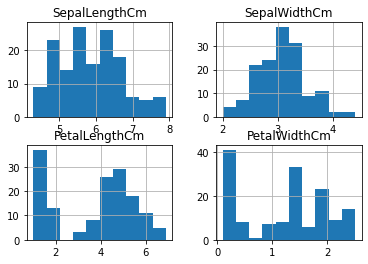

In [7]:
Data.hist()
plt.show()

### Pairplot

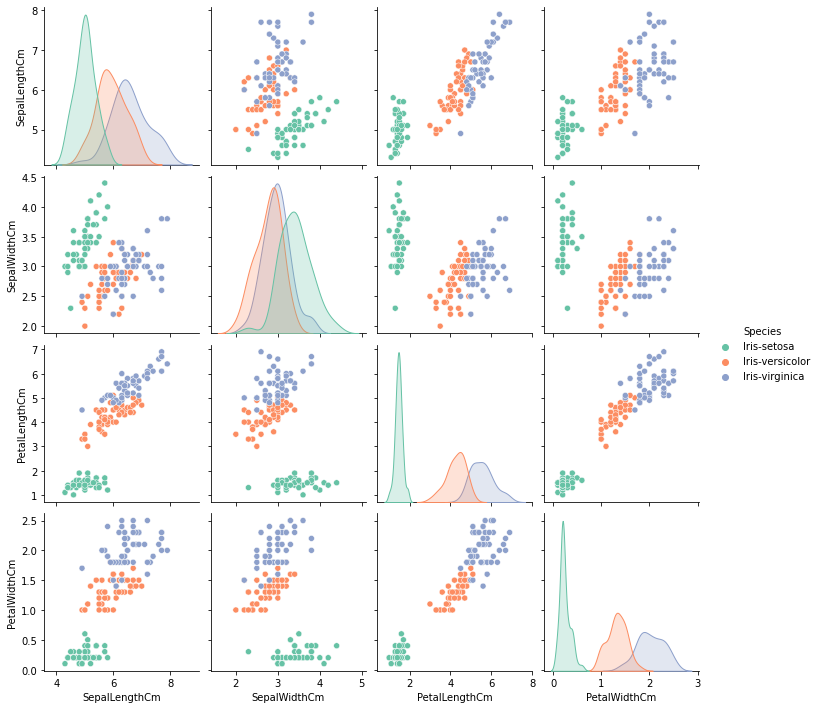

In [8]:
sns.pairplot(data=Data,hue="Species",palette="Set2")


In [9]:
X= Data.drop('Species',axis=1)

In [10]:
y= Data['Species']
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


## Train Test Split


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.2)

## Modeling

In [13]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion = "entropy", random_state =0)


In [14]:
model=Tree.fit(X_train, y_train)
y_pred=Tree.predict(X_test)

## Visualize the Decision Tree

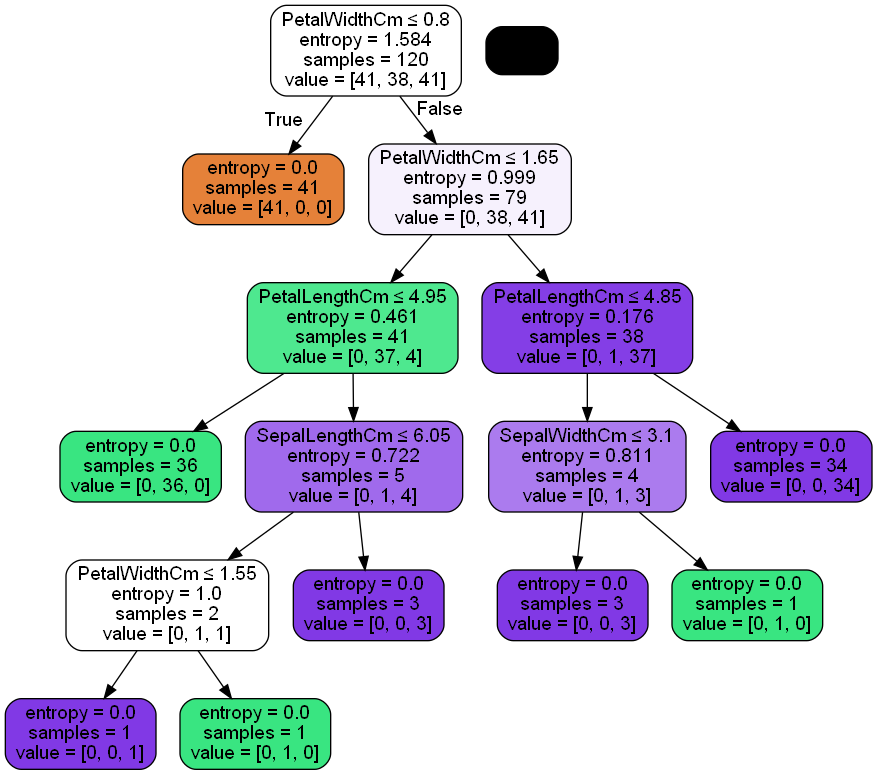

In [15]:
dot_data = StringIO()
export_graphviz(Tree, out_file=dot_data, feature_names= Data.columns.drop('Species'),  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [20]:
from sklearn.metrics import classification_report,accuracy_score
accuracy_score(y_test, y_pred)

0.9666666666666667

### We got 97% accuracy

### You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.